In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import linspace, polyval, polyfit, sqrt, stats, randn


In [2]:
dataset_train = pd.read_csv('nikkei_data.csv')
training_set = dataset_train.iloc[:, 1:2].values


dataset_test = pd.read_csv('nikkei_test_data.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values
INPUT_SIZE = 60

real_stock_price_all = np.concatenate((training_set[INPUT_SIZE:], real_stock_price))

predicted_stock_price_lr = np.array([])
predicted_stock_price_gp = np.array([])
predicted_stock_price = np.array([])


In [3]:
predicted_stock_price_lr =  np.fromfile('lrmodel_reslut.csv',sep=',')
predicted_stock_price_gp =  np.fromfile('gp_reslut.csv',sep=',')
predicted_stock_price =  np.fromfile('rnn_reslut.csv',sep=',')


In [6]:

lrmse = np.sum(sqrt((real_stock_price_all - predicted_stock_price_lr)**2))/len(predicted_stock_price_lr)
gpmse = np.sum(sqrt((real_stock_price_all - predicted_stock_price_gp)**2))/len(predicted_stock_price_gp)
rnnmse = np.sum(sqrt((real_stock_price_all - predicted_stock_price)**2))/len(predicted_stock_price)

print('linear mse = {}, gp mse = {}, rnn mse = {}'.format(lrmse,gpmse,rnnmse))



linear mse = 195760154.0107461, gp mse = 195778904.0038405, rnn mse = 189260636.7906276


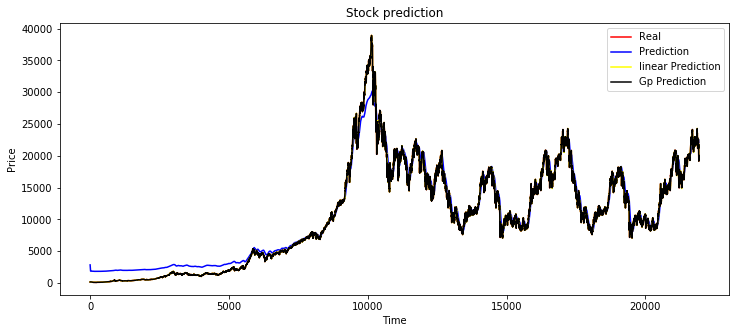

In [5]:
plt.figure(1, figsize=(12, 5))
plt.plot(real_stock_price_all, color = 'red', label = 'Real')
plt.plot(predicted_stock_price, color = 'blue', label = 'Prediction')
plt.plot(predicted_stock_price_lr, color = 'yellow', label = 'linear Prediction')
plt.plot(predicted_stock_price_gp, color = 'black', label = 'Gp Prediction')


plt.title('Stock prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [10]:

gp_file = open('GP_tree.txt')
tree = gp_file.read()
linearReg_file = open('linearReg_parameter.txt')
parameter = linearReg_file.read()

print('tree {}'.format(tree))
print('parameter {}'.format(parameter))

tree 
parameter [ 0.02105453 -0.03551379 -0.00254773  0.01000668  0.00964705  0.02022528
 -0.013501   -0.00453361  0.02470607 -0.00120563 -0.0421825   0.02723953
 -0.00283025 -0.01232029 -0.00733475 -0.01435959  0.01067953  0.03223643
 -0.014802   -0.01074121  0.00786583 -0.03043924  0.00934754  0.01555677
  0.01072368 -0.01317877 -0.01297036  0.00612297  0.01111182  0.026731
 -0.02282994 -0.00737854  0.0087169   0.01426535 -0.03285618  0.00799225
 -0.00618053  0.02602422  0.00540305  0.00834421 -0.02928092 -0.00100841
 -0.00672254  0.00781716 -0.02082908  0.02683352  0.00993424 -0.02577131
  0.00485181 -0.03136073  0.01331897  0.01252489 -0.0033745   0.04085038
 -0.0076407  -0.02642464  0.00683014  0.05839924 -0.05364801  0.99820952]
